In [1]:
import pandas as pd
import numpy as np

## Load data

Using petrol consumption: https://www.kaggle.com/arpikr/petrol-consumption

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.shape

(48, 5)

In [4]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [6]:
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

print(X.shape, y.shape)

(48, 4) (48,)


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=0)

print(X_train.shape, X_test.shape)

(43, 4) (5, 4)


## Using sklearn

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [12]:
y_pred = regressor.predict(X_test)

pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Diff': y_test - y_pred
})

,Actual,Predicted,Diff
29,534,487.0,47.0
4,410,524.0,-114.0
26,577,574.0,3.0
30,571,554.0,17.0
32,577,574.0,3.0


In [14]:
from sklearn.metrics import mean_squared_error

In [16]:
np.sqrt(mean_squared_error(y_test, y_pred))

55.69919209467943

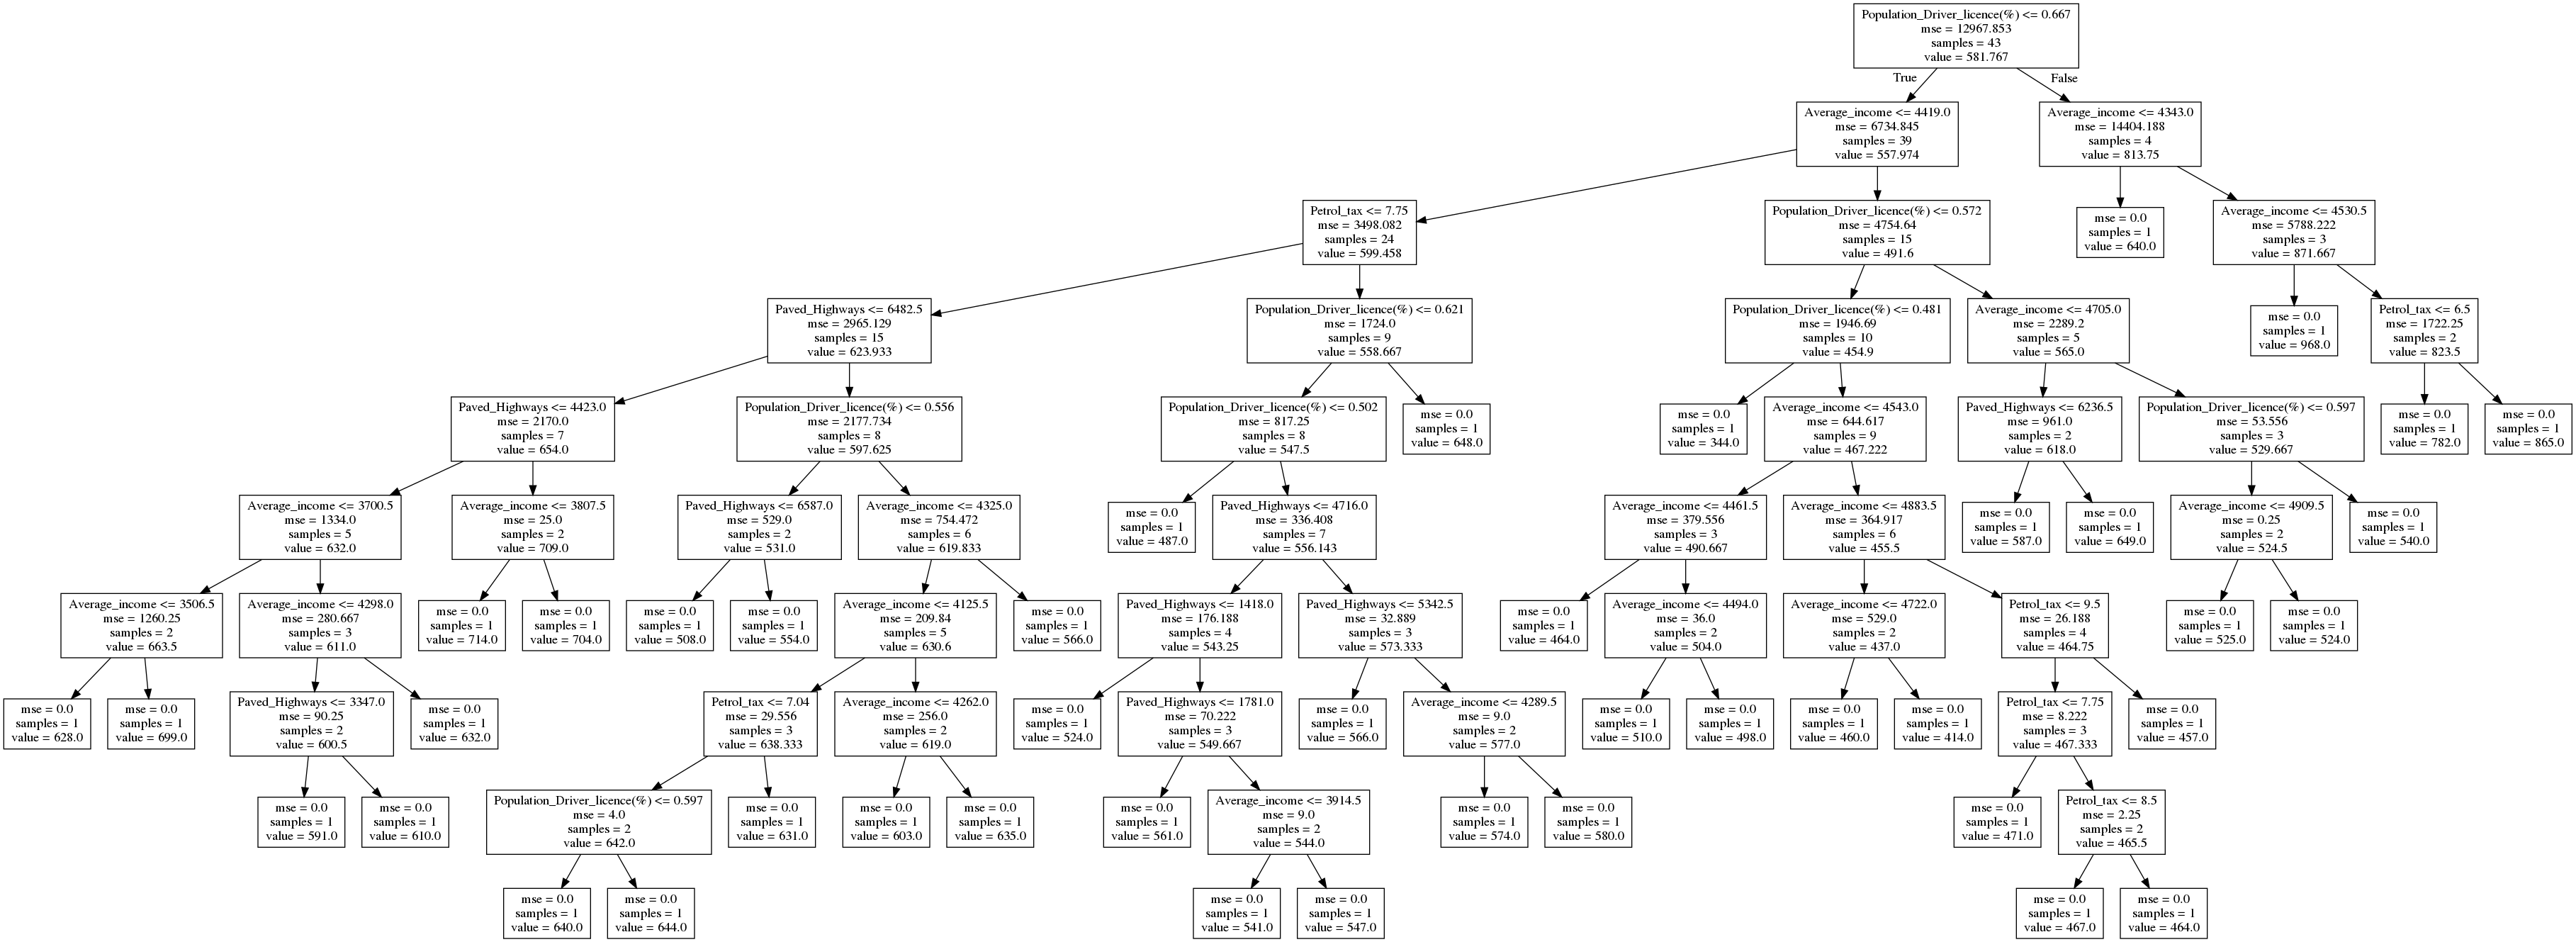

In [20]:
from IPython.display import Image  
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  
export_graphviz(regressor, out_file=dot_data,  
                         feature_names=X.columns)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())